In [1]:
import pandas as pd
import ast
import sqlite3

In [2]:
articles = pd.read_json('temp_stanza.json')
prices = pd.read_json('stock_prices.json')

In [3]:
prices = prices[prices.index.year < 2021]
prices = prices[prices.index.year > 2017]
indices = []

for item in prices.columns.values:
    indices.append(ast.literal_eval(item))
    
prices.columns = pd.MultiIndex.from_tuples(indices)
prices

Adj Close                                                 \
                     A        AAL         AAP        AAPL        ABBV   
2018-01-02   65.523422  51.647564  103.325127   41.135750   80.227058   
2018-01-03   67.190582  51.014023  104.260101   41.128590   81.482521   
2018-01-04   66.686554  51.335670  108.107162   41.319633   81.017815   
2018-01-05   67.752769  51.316177  109.256416   41.790070   82.428185   
2018-01-08   67.898155  50.809341  108.487015   41.634853   81.107498   
...                ...        ...         ...         ...         ...   
2020-12-24  116.487823  15.660000  158.205856  130.994537   97.521835   
2020-12-28  117.004166  16.059999  156.354813  135.679626   97.701271   
2020-12-29  116.408386  15.860000  154.277313  133.873077   98.881805   
2020-12-30  116.567268  16.150000  155.232376  132.731583   99.420128   
2020-12-31  117.659554  15.770000  155.084671  131.709198  101.195663   

                                                                       ...  \
                  ABC        ABMD         ABT         ACN        ADBE  ...   
2018-01-02  87.474403  192.490005   54.864082  144.704468  177.699997  ...   
2018-01-03  87.799957  195.820007   54.985394  145.372360  181.039993  ...   
2018-01-04  87.604614  199.250000   54.892067  147.093674  183.220001  ...   
2018-01-05  88.665016  202.320007   55.050724  148.307007  185.339996  ...   
2018-01-08  90.134712  207.800003   54.892067  149.492203  185.039993  ...   
...               ...         ...         ...         ...         ...  ...   
2020-12-24  95.198929  303.410004  106.325668  253.501236  499.859985  ...   
2020-12-28  95.032036  312.910004  105.776138  255.846100  498.950012  ...   
2020-12-29  95.346191  320.929993  106.306046  253.954468  502.109985  ...   
2020-12-30  95.189110  323.920013  106.413994  253.737732  497.450012  ...   
2020-12-31  95.974503  324.200012  107.444366  257.353516  500.119995  ...   

             Volume                                                        \
                XEL     XLNX       XOM     XRAY     XYL      YUM      ZBH   
2018-01-02  2443400  2579934  11469300  1622300  877800  1747800  1818259   
2018-01-03  4114900  2453316  13957700  1533300  778800  2554900  1368664   
2018-01-04  2807000  3346522  10863000  1052400  796500  1971200  1105396   
2018-01-05  3728000  5683466  11047600  1329000  666800  1927100  1095302   
2018-01-08  3837600  2483233  10927100  1188500  554700  1599400  1286985   
...             ...      ...       ...      ...     ...      ...      ...   
2020-12-24   598400  1167533   8039000   217600  249700   340400   292314   
2020-12-28  1799800  1978494  23877500   576400  408600  1822900   704520   
2020-12-29  1761400  1489992  20287700   458300  501900  1818300   757771   
2020-12-30  1296400  2892686  23807300   527500  418200  1267900   440428   
2020-12-31  1743300  1236254  22786500   607100  504200  1651700   514176   

                                      
              ZBRA     ZION      ZTS  
2018-01-02  310600  2387100  2135600  
2018-01-03  253000  1575700  2328200  
2018-01-04  435200  3309200  2534000  
2018-01-05  301800  1212200  2166100  
2018-01-08  218600  1697700  3631400  
...            ...      ...      ...  
2020-12-24  138300   327700   417400  
2020-12-28  251200   835600  1522400  
2020-12-29  185500  1084100  1188400  
2020-12-30  166100   728400  1009000  
2020-12-31  176500   736300  1292600  

[756 rows x 3012 columns]

In [4]:
adj_close = prices['Adj Close']
adj_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2018-01-02,65.523422,51.647564,103.325127,41.135750,80.227058,87.474403,192.490005,54.864082,144.704468,177.699997,...,42.664852,64.419151,67.227409,65.023300,64.728584,75.761124,116.846626,103.709999,45.207699,69.990463
2018-01-03,67.190582,51.014023,104.260101,41.128590,81.482521,87.799957,195.820007,54.985394,145.372360,181.039993,...,42.379288,65.709816,68.547752,64.800545,65.517845,75.696144,117.656616,105.769997,45.154198,70.312271
2018-01-04,66.686554,51.335670,108.107162,41.319633,81.017815,87.604614,199.250000,54.892067,147.093674,183.220001,...,42.049099,66.896088,68.642632,64.790871,65.955269,76.466751,117.487083,107.860001,45.341450,70.731621
2018-01-05,67.752769,51.316177,109.256416,41.790070,82.428185,88.665016,202.320007,55.050724,148.307007,185.339996,...,41.754616,70.369476,68.587280,65.701218,65.831657,76.912399,118.654984,109.540001,45.359276,71.541023
2018-01-08,67.898155,50.809341,108.487015,41.634853,81.107498,90.134712,207.800003,54.892067,149.492203,185.039993,...,42.066948,70.834488,68.895630,66.146736,66.069374,77.042389,118.881035,110.629997,45.136356,72.399208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,116.487823,15.660000,158.205856,130.994537,97.521835,95.198929,303.410004,106.325668,253.501236,499.859985,...,62.861969,141.466354,38.760456,51.450127,98.975159,105.278343,143.968948,376.890015,42.045433,159.582977
2020-12-28,117.004166,16.059999,156.354813,135.679626,97.701271,95.032036,312.910004,105.776138,255.846100,498.950012,...,63.533100,140.998093,38.890907,51.936630,99.093636,107.471230,143.621674,382.589996,42.064835,161.241180
2020-12-29,116.408386,15.860000,154.277313,133.873077,98.881805,95.346191,320.929993,106.306046,253.954468,502.109985,...,63.630352,139.384033,38.452988,50.884190,98.244560,107.148163,147.055725,378.040009,41.492458,161.966003
2020-12-30,116.567268,16.150000,155.232376,132.731583,99.420128,95.189110,323.920013,106.413994,253.737732,497.450012,...,63.854065,141.575943,38.760456,51.092690,99.498413,107.206902,146.833847,383.750000,41.929016,163.107849


In [5]:
returns_pct = adj_close.pct_change()
returns_pct

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012267,0.009049,-0.000174,0.015649,0.003722,0.017300,0.002211,0.004616,0.018796,...,-0.006693,0.020035,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036899,0.004645,-0.005703,-0.002225,0.017516,-0.001697,0.011841,0.012042,...,-0.007791,0.018053,0.001384,-0.000149,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.015408,0.002890,0.008249,0.011571,...,-0.007003,0.051922,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011443
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,0.027086,-0.002882,0.007992,-0.001619,...,0.007480,0.006608,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004915,0.011996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.000085,-0.014475,0.008726,0.007712,-0.000194,-0.002777,-0.002105,0.008376,-0.000544,0.005937,...,0.004976,0.000000,-0.004070,0.004069,0.005214,0.007023,0.003429,-0.007505,-0.003907,0.005443
2020-12-28,0.004433,0.025543,-0.011700,0.035766,0.001840,-0.001753,0.031311,-0.005168,0.009250,-0.001820,...,0.010676,-0.003310,0.003366,0.009456,0.001197,0.020829,-0.002412,0.015124,0.000461,0.010391
2020-12-29,-0.005092,-0.012453,-0.013287,-0.013315,0.012083,0.003306,0.025630,0.005010,-0.007394,0.006333,...,0.001531,-0.011447,-0.011260,-0.020264,-0.008568,-0.003006,0.023910,-0.011893,-0.013607,0.004495
2020-12-30,0.001365,0.018285,0.006191,-0.008527,0.005444,-0.001647,0.009317,0.001015,-0.000853,-0.009281,...,0.003516,0.015726,0.007996,0.004098,0.012763,0.000548,-0.001509,0.015104,0.010521,0.007050


In [6]:
con = sqlite3.connect('data.db')

cur = con.cursor()

query = """
            SELECT a2c.article_id, c.ticker, count(*) as cnt 
            FROM article_company as a2c, company as c
            WHERE a2c.company_id = c.company_id
            GROUP BY a2c.article_id 
            HAVING cnt = 1;
        """

article_id = [*cur.execute(query)]

con.close()

In [7]:
pairs = pd.DataFrame(article_id, columns=['article_id', 'ticker', 'count']).drop(columns='count').set_index('article_id')

In [8]:
articles = articles.merge(pairs, how='inner', left_index=True, right_index=True)

In [9]:
articles.head(2)

,title,body,href,date,size,stanza_title,stanza_body,bert_title,bert_body,vader_title,vader_body,textblob_title,textblob_body,ticker
867,Apple: Why It ‘Has to’ Keep Raising iPhone Prices,"Sure, might like to be able to keep increasing...",https://www.marketwatch.com/articles/apple-why...,2018-04-16,320,-1.0,-0.142857,0.0,-0.000146,0.0,0.179300,0.0,0.121188,AAPL
1186,Lululemon Can Flourish Even in a ‘Challenging ...,Shares of rose Thursday morning as a bullish a...,https://www.marketwatch.com/articles/luluemon-...,2019-08-29,320,1.0,0.000000,0.0,0.999834,0.0,0.336408,0.5,0.191239,BAC


In [10]:
sentiment_series = articles.groupby(['date', 'ticker'], as_index=False).sum().pivot(index='date', columns='ticker')
sentiment_series.fillna(0, inplace=True)

In [11]:
sentiment_series

size                                                 ...  \
ticker        A  AAL  AAP   AAPL ABBV  ABC ABMD  ABT  ACN ADBE  ...   
date                                                            ...   
2018-01-02  0.0  0.0  0.0  246.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-03  0.0  0.0  0.0  399.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-04  0.0  0.0  0.0  287.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-05  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-08  0.0  0.0  0.0  719.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...         ...  ...  ...    ...  ...  ...  ...  ...  ...  ...  ...   
2020-12-24  0.0  0.0  0.0  605.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-12-28  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-12-29  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-12-30  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-12-31  0.0  0.0  0.0  344.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

           textblob_body                                                    \
ticker               XEL      XLNX       XOM XRAY  XYL       YUM  ZBH ZBRA   
date                                                                         
2018-01-02           0.0  0.000000  0.097076  0.0  0.0 -0.014583  0.0  0.0   
2018-01-03           0.0  0.000000  0.000000  0.0  0.0 -0.011905  0.0  0.0   
2018-01-04           0.0  0.126667  0.000000  0.0  0.0  0.000000  0.0  0.0   
2018-01-05           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2018-01-08           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
...                  ...       ...       ...  ...  ...       ...  ...  ...   
2020-12-24           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2020-12-28           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2020-12-29           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2020-12-30           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2020-12-31           0.0  0.000000 -0.045160  0.0  0.0  0.000000  0.0  0.0   

                      
ticker     ZION  ZTS  
date                  
2018-01-02  0.0  0.0  
2018-01-03  0.0  0.0  
2018-01-04  0.0  0.0  
2018-01-05  0.0  0.0  
2018-01-08  0.0  0.0  
...         ...  ...  
2020-12-24  0.0  0.0  
2020-12-28  0.0  0.0  
2020-12-29  0.0  0.0  
2020-12-30  0.0  0.0  
2020-12-31  0.0  0.0  

[780 rows x 4212 columns]

In [12]:
adj_close

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2018-01-02,65.523422,51.647564,103.325127,41.135750,80.227058,87.474403,192.490005,54.864082,144.704468,177.699997,...,42.664852,64.419151,67.227409,65.023300,64.728584,75.761124,116.846626,103.709999,45.207699,69.990463
2018-01-03,67.190582,51.014023,104.260101,41.128590,81.482521,87.799957,195.820007,54.985394,145.372360,181.039993,...,42.379288,65.709816,68.547752,64.800545,65.517845,75.696144,117.656616,105.769997,45.154198,70.312271
2018-01-04,66.686554,51.335670,108.107162,41.319633,81.017815,87.604614,199.250000,54.892067,147.093674,183.220001,...,42.049099,66.896088,68.642632,64.790871,65.955269,76.466751,117.487083,107.860001,45.341450,70.731621
2018-01-05,67.752769,51.316177,109.256416,41.790070,82.428185,88.665016,202.320007,55.050724,148.307007,185.339996,...,41.754616,70.369476,68.587280,65.701218,65.831657,76.912399,118.654984,109.540001,45.359276,71.541023
2018-01-08,67.898155,50.809341,108.487015,41.634853,81.107498,90.134712,207.800003,54.892067,149.492203,185.039993,...,42.066948,70.834488,68.895630,66.146736,66.069374,77.042389,118.881035,110.629997,45.136356,72.399208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,116.487823,15.660000,158.205856,130.994537,97.521835,95.198929,303.410004,106.325668,253.501236,499.859985,...,62.861969,141.466354,38.760456,51.450127,98.975159,105.278343,143.968948,376.890015,42.045433,159.582977
2020-12-28,117.004166,16.059999,156.354813,135.679626,97.701271,95.032036,312.910004,105.776138,255.846100,498.950012,...,63.533100,140.998093,38.890907,51.936630,99.093636,107.471230,143.621674,382.589996,42.064835,161.241180
2020-12-29,116.408386,15.860000,154.277313,133.873077,98.881805,95.346191,320.929993,106.306046,253.954468,502.109985,...,63.630352,139.384033,38.452988,50.884190,98.244560,107.148163,147.055725,378.040009,41.492458,161.966003
2020-12-30,116.567268,16.150000,155.232376,132.731583,99.420128,95.189110,323.920013,106.413994,253.737732,497.450012,...,63.854065,141.575943,38.760456,51.092690,99.498413,107.206902,146.833847,383.750000,41.929016,163.107849


In [13]:
dropped_assets = [*set(adj_close.columns).difference(sentiment_series['stanza_body'].columns)]

adj_close.drop(columns = dropped_assets, inplace=True)

/home/jradhima/miniconda3/envs/thesis/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [14]:
sentiment_series['size'].merge(adj_close, left_index=True, right_index=True, how='inner')

,A_x,AAL_x,AAP_x,AAPL_x,ABBV_x,ABC_x,ABMD_x,ABT_x,ACN_x,ADBE_x,...,XEL_y,XLNX_y,XOM_y,XRAY_y,XYL_y,YUM_y,ZBH_y,ZBRA_y,ZION_y,ZTS_y
2018-01-02,0.0,0.0,0.0,246.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.664852,64.419151,67.227409,65.023300,64.728584,75.761124,116.846626,103.709999,45.207699,69.990463
2018-01-03,0.0,0.0,0.0,399.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.379288,65.709816,68.547752,64.800545,65.517845,75.696144,117.656616,105.769997,45.154198,70.312271
2018-01-04,0.0,0.0,0.0,287.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.049099,66.896088,68.642632,64.790871,65.955269,76.466751,117.487083,107.860001,45.341450,70.731621
2018-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,41.754616,70.369476,68.587280,65.701218,65.831657,76.912399,118.654984,109.540001,45.359276,71.541023
2018-01-08,0.0,0.0,0.0,719.0,0.0,0.0,0.0,0.0,0.0,0.0,...,42.066948,70.834488,68.895630,66.146736,66.069374,77.042389,118.881035,110.629997,45.136356,72.399208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.0,0.0,0.0,605.0,0.0,0.0,0.0,0.0,0.0,0.0,...,62.861969,141.466354,38.760456,51.450127,98.975159,105.278343,143.968948,376.890015,42.045433,159.582977
2020-12-28,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.533100,140.998093,38.890907,51.936630,99.093636,107.471230,143.621674,382.589996,42.064835,161.241180
2020-12-29,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.630352,139.384033,38.452988,50.884190,98.244560,107.148163,147.055725,378.040009,41.492458,161.966003
2020-12-30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,63.854065,141.575943,38.760456,51.092690,99.498413,107.206902,146.833847,383.750000,41.929016,163.107849


In [15]:
sentiment_series.swaplevel(axis=1)['TSLA'].corr().style.background_gradient(cmap='coolwarm').set_precision(2)

,size,stanza_title,stanza_body,bert_title,bert_body,vader_title,vader_body,textblob_title,textblob_body
size,1.00,-0.54,-0.66,0.09,0.21,0.17,0.71,0.28,0.74
stanza_title,-0.54,1.00,0.58,0.26,0.15,0.24,-0.30,0.07,-0.32
stanza_body,-0.66,0.58,1.00,0.15,0.20,0.04,-0.35,-0.10,-0.41
bert_title,0.09,0.26,0.15,1.00,0.56,0.52,0.31,0.32,0.24
bert_body,0.21,0.15,0.20,0.56,1.00,0.36,0.43,0.26,0.37
vader_title,0.17,0.24,0.04,0.52,0.36,1.00,0.42,0.47,0.31
vader_body,0.71,-0.30,-0.35,0.31,0.43,0.42,1.00,0.37,0.78
textblob_title,0.28,0.07,-0.10,0.32,0.26,0.47,0.37,1.00,0.38
textblob_body,0.74,-0.32,-0.41,0.24,0.37,0.31,0.78,0.38,1.00


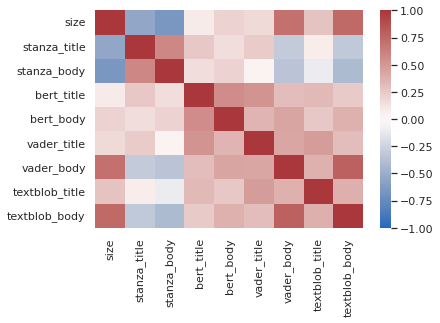

In [16]:
import seaborn as sns
sns.set_theme()

sns.heatmap(sentiment_series.swaplevel(axis=1)['TSLA'].corr(), center=0, vmin=-1, vmax=1, cmap="vlag");

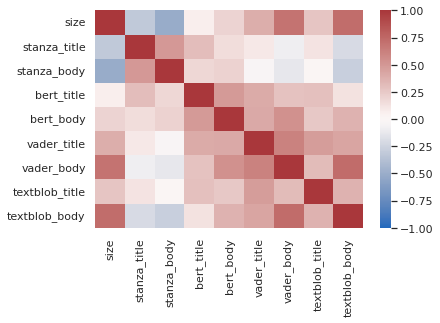

In [17]:
sns.heatmap(sentiment_series.swaplevel(axis=1)['AMZN'].corr(), center=0, vmin=-1, vmax=1, cmap="vlag");

In [18]:
import matplotlib.pyplot as plt

In [64]:
def plot_group_sentiments(to_plot, sector='Tech Stocks', filename=None):
    fig, ax = plt.subplots(len(to_plot), 3, figsize=(10, 10))
    title_sent = ['bert_title', 'stanza_title', 'textblob_title', 'vader_title']
    body_sent = ['bert_body', 'stanza_body', 'textblob_body', 'vader_body']

    for idx, company in enumerate(to_plot):
        ax[idx, 0].plot(adj_close[company[0]])
        ax[idx, 0].set_ylabel(company[1])

        ax[idx, 1].plot(sentiment_series.drop(columns='size').swaplevel(axis=1)[company[0]][body_sent].cumsum(),
                        label=['Finbert', 'Stanza', 'Textblob', 'Vader'])

        ax[idx, 2].plot(sentiment_series.drop(columns='size').swaplevel(axis=1)[company[0]][title_sent].cumsum(),
                       label=['Finbert', 'Stanza', 'Textblob', 'Vader'])

    ax[0, 0].set_title('Stock Price')
    ax[0, 1].set_title('Cumulative Text Sentiment')
    ax[0, 2].set_title('Cumulative Title Sentiment')
    ax[0, 2].legend()

    #for i in range(3):
    #   ax[len(to_plot) - 1, i].set_xlabel('date')

    fig.suptitle('Price v. Sentiment | ' + sector, fontweight='bold')
    fig.autofmt_xdate(rotation=45)
    fig.tight_layout()
    if filename:
        fig.savefig(filename + '.jpg')

In [20]:
#articles.groupby('ticker').size().sort_values(ascending=False)[:40]
tech_4 = [('TSLA', 'Tesla'), ('AAPL', 'Apple'), ('AMZN', 'Amazon'), ('FB', 'Facebook')]
fin_4 = [('WFC', 'Wells Fargo'), ('JPM', 'J. P. Morgan'), ('GS', 'Goldman Sachs'), ('MS', 'Morgan Stanley')]
indu_4 = [('BA', 'Boeing'), ('GE', 'General Electric'), ('GM', 'General Motors'), ('NKE', 'Nike')]
commer_4 = [('WMT', 'Walmart'), ('SBUX', 'Starbucks'), ('COST', 'Costco'), ('MCD', "McDonald's")]

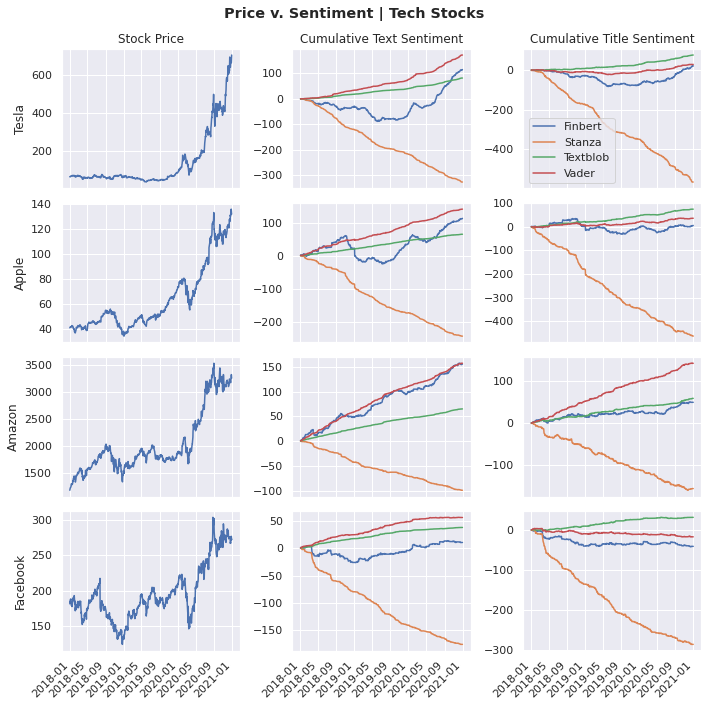

In [65]:
plot_group_sentiments(tech_4, 'Tech Stocks', 'tech_stocks')

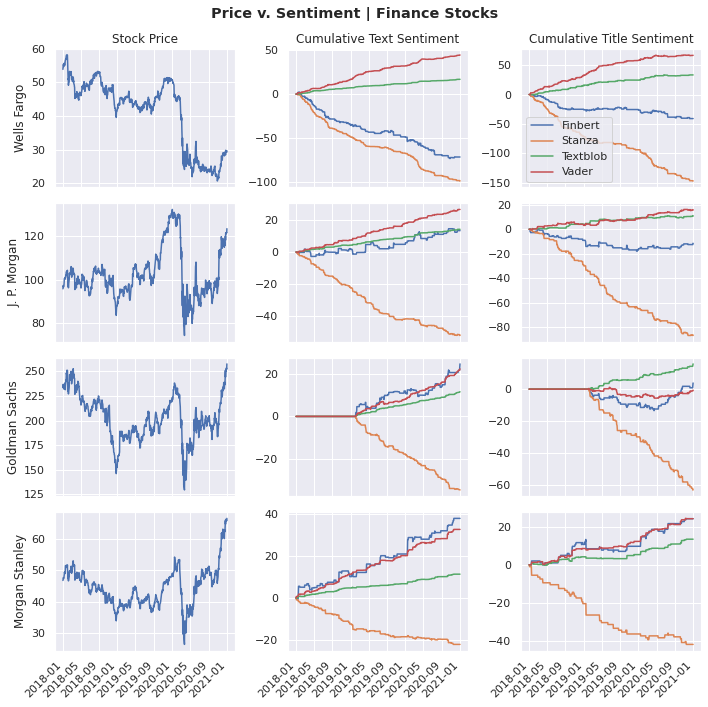

In [66]:
plot_group_sentiments(fin_4, 'Finance Stocks', 'finance_stocks')

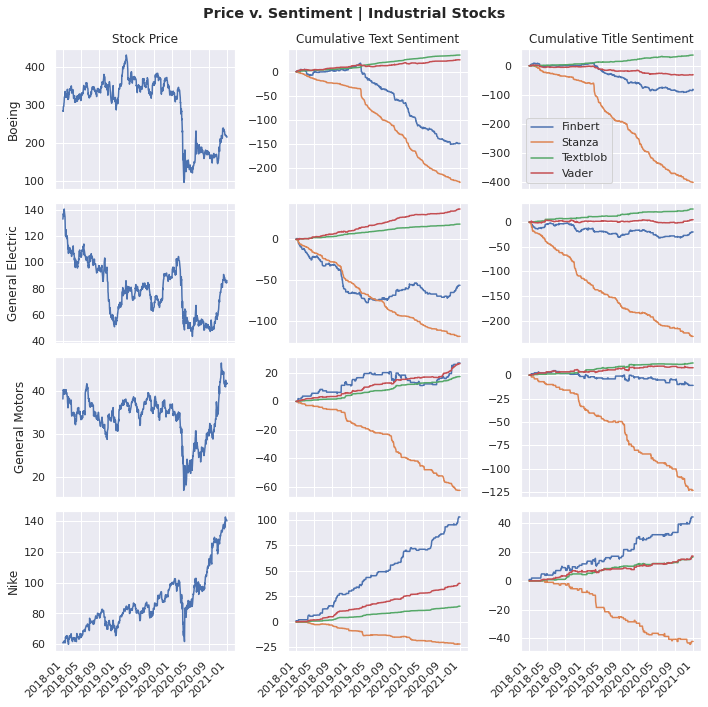

In [67]:
plot_group_sentiments(indu_4, 'Industrial Stocks', 'industrial_stocks')

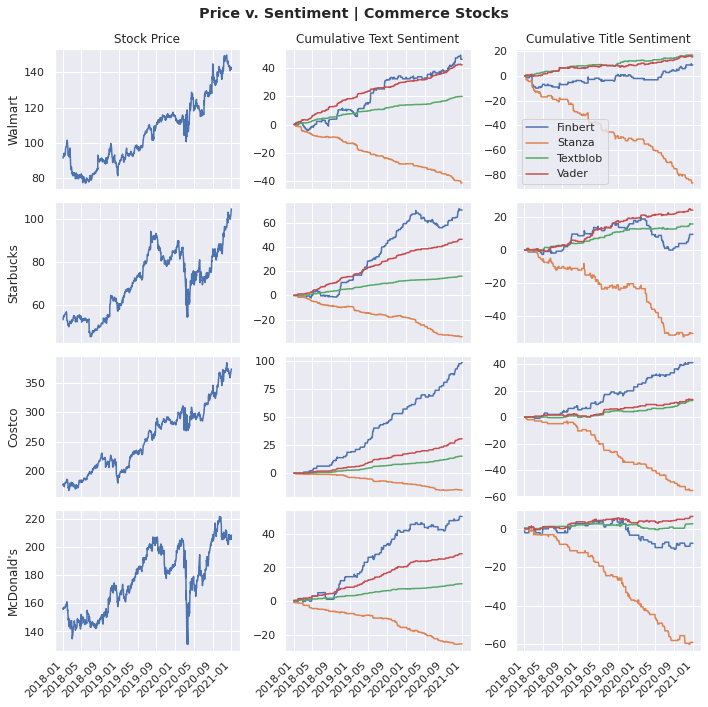

In [68]:
plot_group_sentiments(commer_4, 'Commerce Stocks', 'commerce_stocks')

# Correlation between returns and sentiment

In [25]:
returns_pct

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,XEL,XLNX,XOM,XRAY,XYL,YUM,ZBH,ZBRA,ZION,ZTS
2018-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-01-03,0.025444,-0.012267,0.009049,-0.000174,0.015649,0.003722,0.017300,0.002211,0.004616,0.018796,...,-0.006693,0.020035,0.019640,-0.003426,0.012193,-0.000858,0.006932,0.019863,-0.001183,0.004598
2018-01-04,-0.007501,0.006305,0.036899,0.004645,-0.005703,-0.002225,0.017516,-0.001697,0.011841,0.012042,...,-0.007791,0.018053,0.001384,-0.000149,0.006676,0.010180,-0.001441,0.019760,0.004147,0.005964
2018-01-05,0.015988,-0.000380,0.010631,0.011385,0.017408,0.012104,0.015408,0.002890,0.008249,0.011571,...,-0.007003,0.051922,-0.000806,0.014051,-0.001874,0.005828,0.009941,0.015576,0.000393,0.011443
2018-01-08,0.002146,-0.009877,-0.007042,-0.003714,-0.016022,0.016576,0.027086,-0.002882,0.007992,-0.001619,...,0.007480,0.006608,0.004496,0.006781,0.003611,0.001690,0.001905,0.009951,-0.004915,0.011996
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-24,0.000085,-0.014475,0.008726,0.007712,-0.000194,-0.002777,-0.002105,0.008376,-0.000544,0.005937,...,0.004976,0.000000,-0.004070,0.004069,0.005214,0.007023,0.003429,-0.007505,-0.003907,0.005443
2020-12-28,0.004433,0.025543,-0.011700,0.035766,0.001840,-0.001753,0.031311,-0.005168,0.009250,-0.001820,...,0.010676,-0.003310,0.003366,0.009456,0.001197,0.020829,-0.002412,0.015124,0.000461,0.010391
2020-12-29,-0.005092,-0.012453,-0.013287,-0.013315,0.012083,0.003306,0.025630,0.005010,-0.007394,0.006333,...,0.001531,-0.011447,-0.011260,-0.020264,-0.008568,-0.003006,0.023910,-0.011893,-0.013607,0.004495
2020-12-30,0.001365,0.018285,0.006191,-0.008527,0.005444,-0.001647,0.009317,0.001015,-0.000853,-0.009281,...,0.003516,0.015726,0.007996,0.004098,0.012763,0.000548,-0.001509,0.015104,0.010521,0.007050


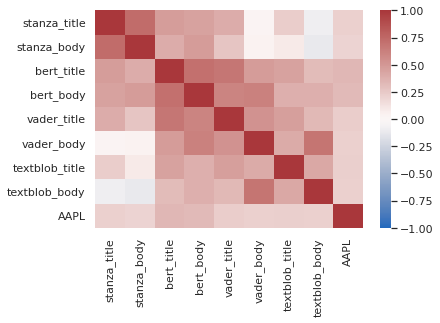

In [26]:
sns.heatmap(sentiment_series.drop(columns='size').swaplevel(axis=1)['AAPL'].merge(
    returns_pct['AAPL'], left_index=True, right_index=True, how='inner').corr(), center=0, vmin=-1, vmax=1, cmap="vlag");

In [27]:
to_drop = set(sentiment_series.index).difference(set(returns_pct.index))

aligned_sentiments = sentiment_series.drop(to_drop)
aligned_sentiments

size                                                 ...  \
ticker        A  AAL  AAP   AAPL ABBV  ABC ABMD  ABT  ACN ADBE  ...   
date                                                            ...   
2018-01-02  0.0  0.0  0.0  246.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-03  0.0  0.0  0.0  399.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-04  0.0  0.0  0.0  287.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-05  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2018-01-08  0.0  0.0  0.0  719.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
...         ...  ...  ...    ...  ...  ...  ...  ...  ...  ...  ...   
2020-12-24  0.0  0.0  0.0  605.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-12-28  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-12-29  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-12-30  0.0  0.0  0.0    0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   
2020-12-31  0.0  0.0  0.0  344.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   

           textblob_body                                                    \
ticker               XEL      XLNX       XOM XRAY  XYL       YUM  ZBH ZBRA   
date                                                                         
2018-01-02           0.0  0.000000  0.097076  0.0  0.0 -0.014583  0.0  0.0   
2018-01-03           0.0  0.000000  0.000000  0.0  0.0 -0.011905  0.0  0.0   
2018-01-04           0.0  0.126667  0.000000  0.0  0.0  0.000000  0.0  0.0   
2018-01-05           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2018-01-08           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
...                  ...       ...       ...  ...  ...       ...  ...  ...   
2020-12-24           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2020-12-28           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2020-12-29           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2020-12-30           0.0  0.000000  0.000000  0.0  0.0  0.000000  0.0  0.0   
2020-12-31           0.0  0.000000 -0.045160  0.0  0.0  0.000000  0.0  0.0   

                      
ticker     ZION  ZTS  
date                  
2018-01-02  0.0  0.0  
2018-01-03  0.0  0.0  
2018-01-04  0.0  0.0  
2018-01-05  0.0  0.0  
2018-01-08  0.0  0.0  
...         ...  ...  
2020-12-24  0.0  0.0  
2020-12-28  0.0  0.0  
2020-12-29  0.0  0.0  
2020-12-30  0.0  0.0  
2020-12-31  0.0  0.0  

[756 rows x 4212 columns]

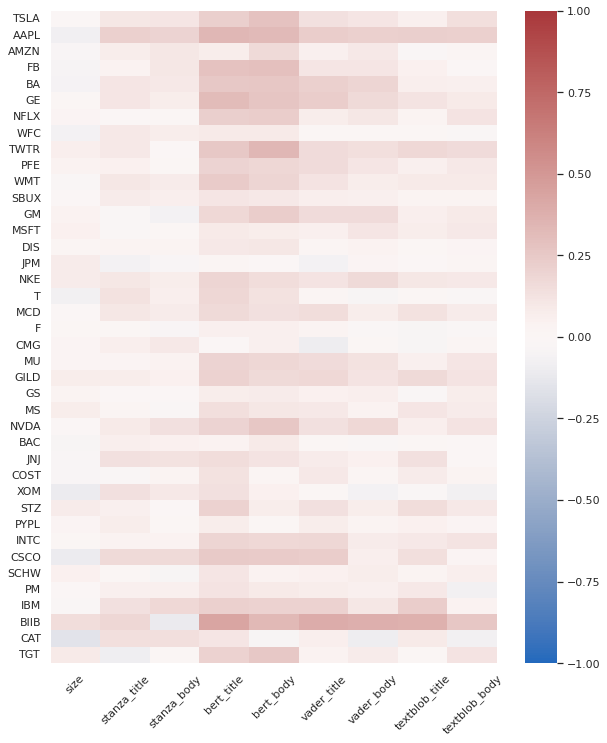

In [31]:
sorted_by_volume = articles.groupby('ticker').size().sort_values(ascending=False).index.values
correlations = []

# this has 1 day lag: today's news for tomorrow's gains
for ticker in sorted_by_volume:
    correlations.append(aligned_sentiments.swaplevel(axis=1)[ticker][:-1].corrwith(returns_pct[ticker][1:]))
    
correlation_df = pd.DataFrame(correlations, index=sorted_by_volume)

plt.figure(figsize = (10, 12))
sns.heatmap(correlation_df[:40], center=0, vmin=-1, vmax=1, cmap="vlag");
plt.xticks(rotation=45);

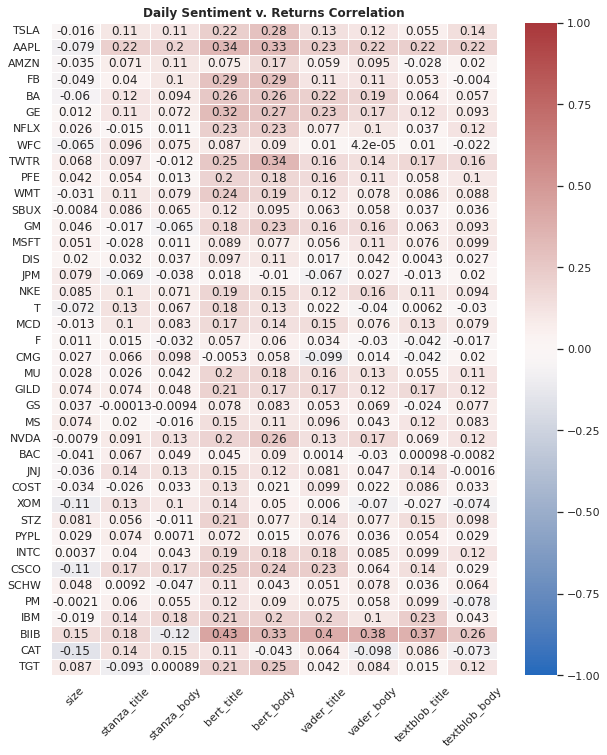

In [73]:
#sorted_by_volume = articles.groupby('ticker').size().sort_values(ascending=False).index.values
correlations_no_lag = []

# this has 1 day lag: today's news for tomorrow's gains
for ticker in sorted_by_volume:
    correlations_no_lag.append(aligned_sentiments.swaplevel(axis=1)[ticker].corrwith(returns_pct[ticker]))
    
correlations_no_lag_df = pd.DataFrame(correlations_no_lag, index=sorted_by_volume)

plt.figure(figsize = (10, 12))
sns.heatmap(correlations_no_lag_df[:40], center=0, vmin=-1, vmax=1, cmap="vlag", annot=True, linewidths=.5);
plt.xticks(rotation=45);
plt.title('Daily Sentiment v. Returns Correlation', fontweight='bold');
plt.savefig('daily_returns_corr.jpg')

/home/jradhima/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/jradhima/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/jradhima/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/jradhima/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2493: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/home/jradhima/miniconda3/envs/thesis/lib/python3.9/site-packages/numpy/lib/function_base.py:2634: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/home/jradhima/miniconda3/envs/thesis/lib/python3.9/site-packages/

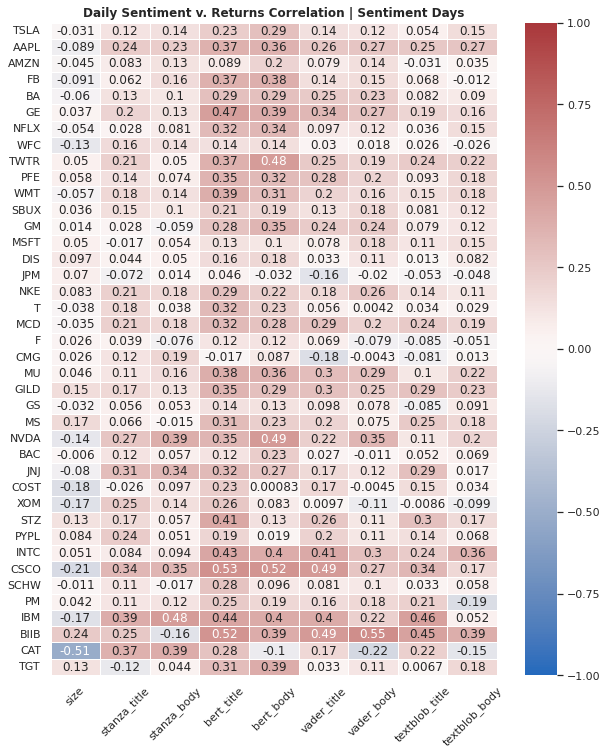

In [75]:
#sorted_by_volume = articles.groupby('ticker').size().sort_values(ascending=False).index.values
correlations_no_lag = []

# this has 1 day lag: today's news for tomorrow's gains
for ticker in sorted_by_volume:
    mask = aligned_sentiments.swaplevel(axis=1)[ticker]['size'] != 0
    correlations_no_lag.append(aligned_sentiments[mask].swaplevel(axis=1)[ticker].corrwith(returns_pct[mask][ticker]))
    
correlations_no_lag_df = pd.DataFrame(correlations_no_lag, index=sorted_by_volume)

plt.figure(figsize = (10, 12))
sns.heatmap(correlations_no_lag_df[:40], center=0, vmin=-1, vmax=1, cmap="vlag", annot=True, linewidths=.5);
plt.xticks(rotation=45);
plt.title('Daily Sentiment v. Returns Correlation | Sentiment Days', fontweight='bold');
plt.savefig('daily_returns_corr_active.jpg')

In [47]:
aligned_sentiments.to_json('aligned_sentiments.json')

In [57]:
mask = aligned_sentiments.swaplevel(axis=1)['TSLA']['size'] != 0 #.corrwith(returns_pct[ticker])
aligned_sentiments[mask].swaplevel(axis=1)['TSLA'].corrwith(returns_pct[mask]['TSLA'])

size             -0.030900
stanza_title      0.124823
stanza_body       0.138703
bert_title        0.228304
bert_body         0.293833
vader_title       0.138818
vader_body        0.120404
textblob_title    0.054320
textblob_body     0.151164
dtype: float64